#### Задача 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [421]:
import numpy as np
import matplotlib.pyplot as plt

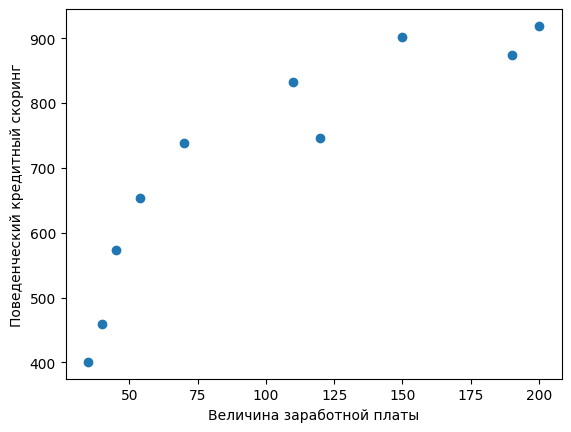

In [422]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Зависимость можно описать линейной формулой ks = a + b * zp

In [423]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [424]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

Функция, описывающая зависимость выглядит следующим образом:
ks = 444.1774 +2.6205 * zp

In [425]:
y_pred = a + b * zp
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

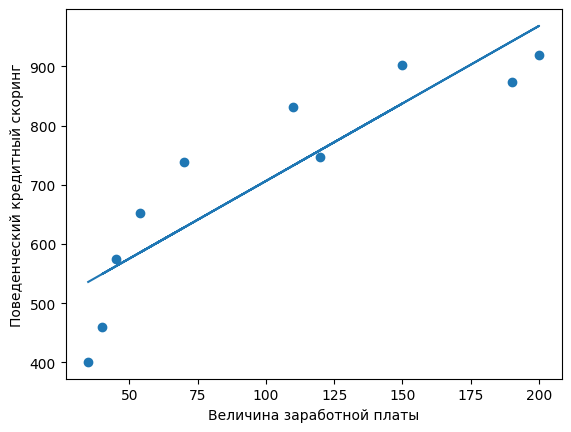

In [426]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

без интерсепта

In [427]:
zp1 = zp.reshape(-1, 1)
ks1 = ks.reshape(-1, 1)


In [428]:
B=np.dot(np.linalg.inv(np.dot(zp1.T,zp1)),np.dot(zp1.T,ks1))
B

array([[5.88982042]])

In [429]:
y_pred1 = 5.8898 * zp
y_pred1

array([ 206.143 ,  265.041 , 1119.062 , 1177.96  ,  235.592 ,  412.286 ,
        318.0492,  883.47  ,  706.776 ,  647.878 ])

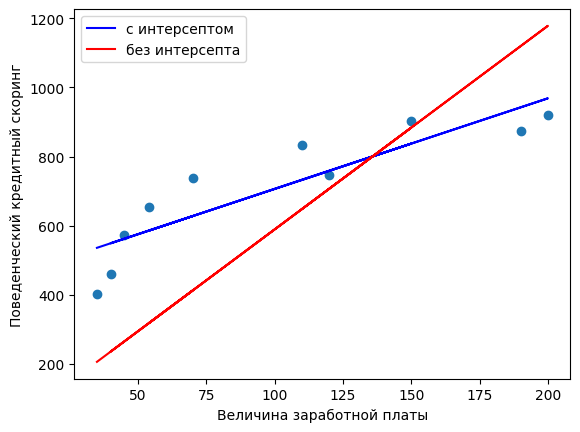

In [430]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred, 'b', label = 'с интерсептом')
plt.plot(zp, y_pred1, 'r', label = 'без интерсепта')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

#### Задача 2 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [431]:
alpha = 1e-6
b1 = 0.1

In [432]:
def mse_(b1, y = ks, x = zp, n = len(zp)):
    return np.sum((b1 * x - y)**2)/n

In [433]:
for i in range(1000):
    b1-= alpha * (2/len(zp)) * np.sum((b1 * zp - ks)*zp)
    if i % 100 == 0:
        print(f'Итерация: {i}, b1 : {b1}, mse: {mse_(b1) }')

Итерация: 0, b1 : 0.25952808, mse: 493237.7212546963
Итерация: 100, b1 : 5.54537842245223, mse: 58151.31823171113
Итерация: 200, b1 : 5.868748638669329, mse: 56522.97550129376
Итерация: 300, b1 : 5.888531320728348, mse: 56516.88130936019
Итерация: 400, b1 : 5.8897415574471985, mse: 56516.85850140053
Итерация: 500, b1 : 5.889815595583751, mse: 56516.858416040064
Итерация: 600, b1 : 5.889820124983314, mse: 56516.85841572062
Итерация: 700, b1 : 5.889820402076462, mse: 56516.85841571941
Итерация: 800, b1 : 5.88982041902807, mse: 56516.8584157194
Итерация: 900, b1 : 5.889820420065112, mse: 56516.85841571941


In [434]:
y_pred2 = 5.8898 * zp
y_pred2

array([ 206.143 ,  265.041 , 1119.062 , 1177.96  ,  235.592 ,  412.286 ,
        318.0492,  883.47  ,  706.776 ,  647.878 ])

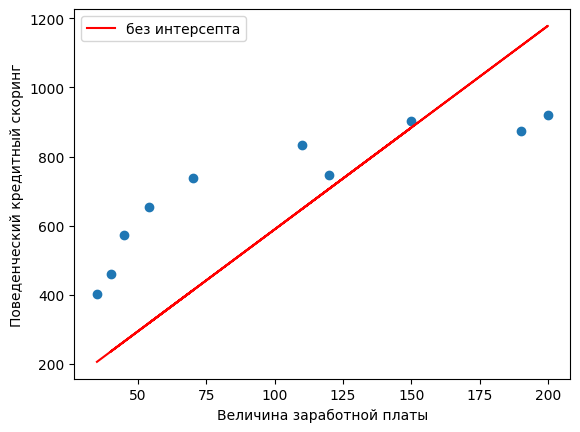

In [435]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred2, 'r', label = 'без интерсепта')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

#### Задача 3 (Дополнительно) 
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [436]:
alpha = 5e-5

b0 = 0.1
b1 = 0.1
def mse_(b0, b1, y = ks, x = zp, n = len(zp)):
    return np.sum((b0 + b1 * x - y)**2)/n

In [437]:
for i in range(500000):
    y_pred3 = b0 + b1 * zp
    b0-= alpha * (2/len(zp)) * np.sum((y_pred3 - ks))
    b1-= alpha * (2/len(zp)) * np.sum((y_pred3 - ks)*zp)
    
    if i % 1000 == 0:
        print(f'Итерация: {i}, b0 : {b0}, b1 : {b1}, mse: {mse_(b0, b1) }')

Итерация: 0, b0 : 0.169966, b1 : 8.07539, mse: 122360.8044853729
Итерация: 1000, b0 : 11.275078368752585, b1 : 5.806891052608021, mse: 54008.33023975122
Итерация: 2000, b0 : 22.11773875916579, b1 : 5.727084278319049, mse: 51656.84092031625
Итерация: 3000, b0 : 32.68882912082914, b1 : 5.649276379509683, mse: 49421.669321139096
Итерация: 4000, b0 : 42.995151315819015, b1 : 5.573417291467764, mse: 47297.06172182904
Итерация: 5000, b0 : 53.04333684378999, b1 : 5.499458203423882, mse: 45277.549012957876
Итерация: 6000, b0 : 62.83985110894726, b1 : 5.427351527144564, mse: 43357.932617621394
Итерация: 7000, b0 : 72.39099758014613, b1 : 5.357050866312114, mse: 41533.271109398236
Итерация: 8000, b0 : 81.70292184679549, b1 : 5.28851098667136, mse: 39798.86749225909
Итерация: 9000, b0 : 90.7816155731757, b1 : 5.221687786924133, mse: 38150.25710968206
Итерация: 10000, b0 : 99.63292035371514, b1 : 5.156538270352723, mse: 36583.19615185046
Итерация: 11000, b0 : 108.26253147170577, b1 : 5.09302051715

In [438]:
y_pred3 = 444.1759 + 2.6205 * zp
y_pred3 

array([535.8934, 562.0984, 942.0709, 968.2759, 548.9959, 627.6109,
       585.6829, 837.2509, 758.6359, 732.4309])

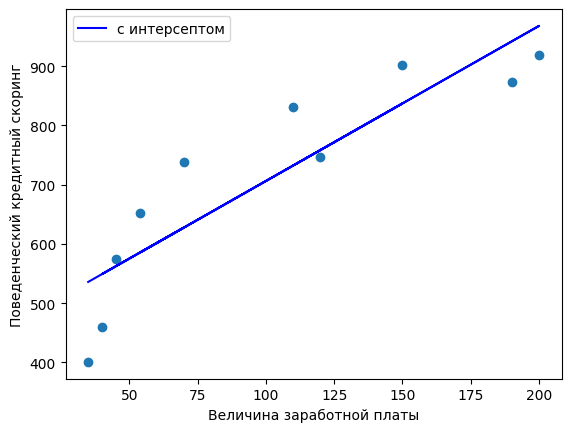

In [439]:
plt.scatter(zp, ks)
plt.plot(zp, y_pred3, 'b', label = 'с интерсептом')
plt.legend()
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()